# FastText - Word Vectors & Text Classification

Hello and welcome to the IAA FastText tutorial!

In this tutorial, we will dive into the following topics:

- Word vectors and continuous word space visualization
- Text classification

You will be able to experiment freely with word vectors and then move onto classifying text into categories. So, let's get started!

We'll be using FastText from Facebook throughout this tutorial. FastText is a highly optimized open-source tool that serves the following three purposes:

- Learning vector representations for words. See [this paper](https://arxiv.org/pdf/1301.3781.pdf).
- Classifying text into categories. See [this paper](https://arxiv.org/pdf/1607.01759.pdf).
- Compressing these models to work on mobile devices. See [this paper](https://arxiv.org/pdf/1612.03651.pdf).

## Word representations via Skipgram model

In 2013, the research group around Thomas Mikolov at Google [introduced](https://arxiv.org/pdf/1301.3781.pdf) two models for learning vector representations for words from very large data sets. In this tutorial, we will concentrate on the Skipgram model.

The skipgram model is surprisingly simple: Given a sentence, it predicts the surrounding words given the current word. Due to limited time in this tutorial, we cannot explain this model in detail. Please refer to [the original paper](https://arxiv.org/pdf/1301.3781.pdf), [our presentation in the team meeting](https://orangesharing.com/confluence/download/attachments/35651640/DOCLA%20FINAL_v3.pptx?version=1&modificationDate=1510305214047&api=v2) as well as [this excellent blog post](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/).

Facebook provides pre-trained models trained on Wikipedia. We have prepared these models in this workspace. So, let's load them!

In [102]:
import numpy as np
%pylab inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

import fastText

Populating the interactive namespace from numpy and matplotlib


In [72]:
vec_model = fastText.load_model("wiki.en.bin")

We have now loaded the pre-trained skipgram model. Note that this model was trained using sub-word information, meaning that a word is composed of a set of n-grams. We can see the n-grams a made is up of using the `get_subwords` function:

In [73]:
vec_model.get_subwords("Wikipedia")

(['<Wi',
  '<Wik',
  '<Wiki',
  '<Wikip',
  'Wik',
  'Wiki',
  'Wikip',
  'Wikipe',
  'iki',
  'ikip',
  'ikipe',
  'ikiped',
  'kip',
  'kipe',
  'kiped',
  'kipedi',
  'ipe',
  'iped',
  'ipedi',
  'ipedia',
  'ped',
  'pedi',
  'pedia',
  'pedia>',
  'edi',
  'edia',
  'edia>',
  'dia',
  'dia>',
  'ia>'],
 array([2687521, 4176702, 4464113, 3365183, 2891004, 3368715, 2528365,
        3703676, 3360838, 3088430, 3734365, 2960415, 3583541, 4103636,
        3494260, 2885315, 3309957, 3864535, 3689398, 3311169, 3519608,
        3537807, 3432822, 4513568, 3119881, 3214276, 3085910, 3969639,
        2531043, 2799581]))

In the previous output, the `<` and `>` indicate the beginning and end of a word.

The vector representation of a word can be queries using the `get_word_vector` function:

In [62]:
vec_model.get_word_vector("Wikipedia")

array([-0.19710374, -0.32406542, -0.27992466,  0.03215932, -0.26347142,
       -0.17406814,  0.27865204, -0.35268489, -0.06575041,  0.16746461,
       -0.22918601,  0.14560759, -0.08067662,  0.15618187,  0.05974622,
       -0.19944344, -0.14420216,  0.05859416, -0.14302237,  0.19625185,
       -0.17889747,  0.42659137, -0.21454638,  0.01065555, -0.0725894 ,
       -0.06344882, -0.12478225,  0.21429643, -0.26189515,  0.12573811,
       -0.3438704 ,  0.13429029, -0.20808646,  0.02837938, -0.37477136,
       -0.27997339, -0.19806536,  0.07779928, -0.07717752, -0.0728948 ,
       -0.09503662,  0.00841476, -0.03266108,  0.1387451 , -0.01365832,
        0.47560605, -0.17646891, -0.16366199,  0.01501894,  0.10416513,
        0.04873297, -0.34947178,  0.03553875, -0.045429  , -0.15141396,
        0.29017088,  0.04766348, -0.38104695,  0.15794057,  0.35131243,
        0.06430718,  0.12601593,  0.31181747, -0.1092104 ,  0.03415869,
       -0.23455599,  0.51612747,  0.27065933, -0.16340432, -0.00

## Word vector arithmetic in continuous space

By now, you may have seen visualizations of word vectors and word relationships on several occasions. But does this actually work?

In [67]:
f = vec_model
x=np.array(f.get_word_vector('wine'))
z=np.array(f.get_word_vector('france'))
x=x-z

y=np.array(f.get_word_vector('beer'))
b=np.array(f.get_word_vector('germany'))
y=y-b

x = x.reshape(1,-1)
y = y.reshape(1,-1)

In [68]:
cosine_similarity(x,y)

array([[-2.]], dtype=float32)

## Word vector visualization with t-SNE

In [75]:
targets = ['man','woman','king','queen','brother','sister','father','mother','grandfather','grandmother',
           'cat','dog','bird','squirrel','horse','pig','dove','wolf','kitten','puppy']
classes = [1,1,1,1,1,1,1,1,1,1,
           2,2,2,2,2,2,2,2,2,2]

In [76]:
X_target=[]
for w in targets:
    X_target.append(vec_model.get_word_vector(w))
X_target = np.asarray(X_target)

In [81]:
word_list = vec_model.get_words()[:10000]

In [83]:
X_subset=[]

for w in word_list:
    X_subset.append(vec_model.get_word_vector(w))
X_subset = np.asarray(X_subset)

In [86]:
%%time
X_tsne = TSNE(n_components=2, perplexity=40, init='pca', method='exact',
                  random_state=0, n_iter=250, verbose=2).fit_transform(X_target)
print(X_tsne.shape)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 10020
[t-SNE] Computed conditional probabilities for sample 2000 / 10020
[t-SNE] Computed conditional probabilities for sample 3000 / 10020
[t-SNE] Computed conditional probabilities for sample 4000 / 10020
[t-SNE] Computed conditional probabilities for sample 5000 / 10020
[t-SNE] Computed conditional probabilities for sample 6000 / 10020
[t-SNE] Computed conditional probabilities for sample 7000 / 10020
[t-SNE] Computed conditional probabilities for sample 8000 / 10020
[t-SNE] Computed conditional probabilities for sample 9000 / 10020
[t-SNE] Computed conditional probabilities for sample 10000 / 10020
[t-SNE] Computed conditional probabilities for sample 10020 / 10020
[t-SNE] Mean sigma: 1.098827
[t-SNE] Iteration 50: error = 93.4125022, gradient norm = 0.1155721 (50 iterations in 159.929s)
[t-SNE] Iteration 100: error = 93.9303418, gradient norm = 0.0929508 (50 iterations in 159.034s)

In [87]:
X_tsne_target = X_tsne[-20:,:]
print(X_tsne_target.shape)

(20, 2)


In [105]:
def plot_words(X, labels, classes=None, xlimits=None, ylimits=None):
    fig = figure(figsize=(8, 8))
    if xlimits is not None:
        xlim(xlimits)
    if ylimits is not None:
        ylim(ylimits)
    scatter(X[:, 0], X[:, 1], c=classes)
    for i, txt in enumerate(labels):
        annotate(txt, (X[i, 0], X[i, 1]))

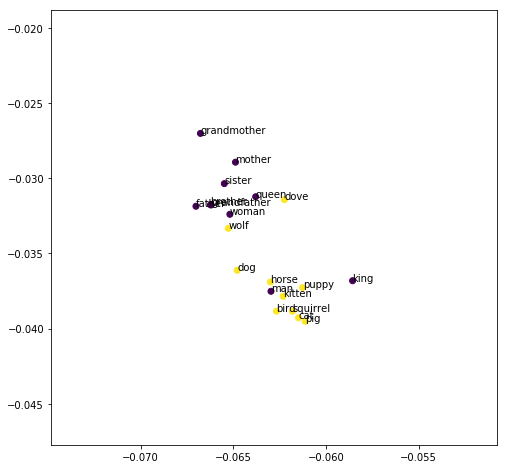

In [106]:
plot_words(X_tsne_target, targets, classes=classes)